#Car Price Prediction Multiple Linear Regression

In [15]:
#Impotrt libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Step 1: Load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CarPrice.csv')

In [9]:
# Step 2: Explore data
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
df['price'].describe()

,price
count,205.000000
mean,13276.710571
std,7988.852332
min,5118.000000
25%,7788.000000
50%,10295.000000
75%,16503.000000
max,45400.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

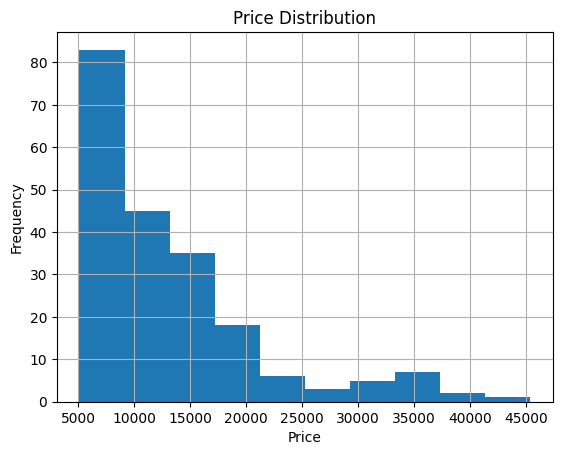

In [14]:
# Plot distribution of prices
df['price'].hist()
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

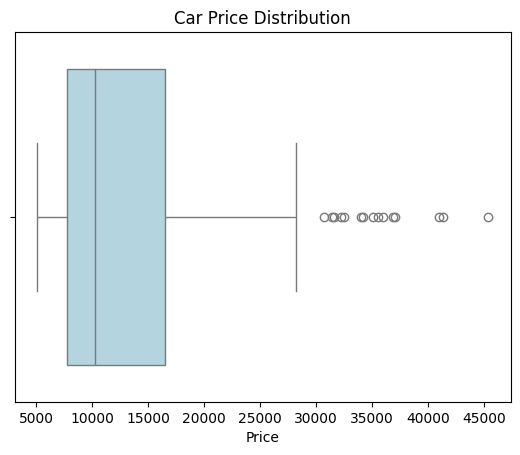

In [21]:
#Box Plot
sns.boxplot(x=df['price'], color='lightblue')
plt.title('Car Price Distribution')
plt.xlabel('Price')
plt.show()

In [23]:
# Step 3: Data preprocessing

# Convert categorical columns to numeric using get_dummies
categorical_cols = [
    'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
    'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'
]

# Use get_dummies for one-hot encoding
car_data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Drop columns that are IDs
car_data_encoded = car_data_encoded.drop(['car_ID', 'CarName'], axis=1)

In [29]:
car_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelty

In [43]:
# Split features and target
X = car_data_encoded.drop('price', axis=1)
y = car_data_encoded['price']

In [44]:
# Step 4: Split data into training and testing sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Step 5: Train Linear Regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predict on test set
y_pred = linear_model.predict(X_test)

In [34]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MAE: {mae}")
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R²: {r2}")

Linear Regression MAE: 2089.3827292047445
Linear Regression MSE: 8482008.484371819
Linear Regression R²: 0.8925566700320243


In [45]:
# Step 6: Train Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [46]:
# Evaluate Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R²: {r2_rf}")

Random Forest MAE: 1277.6650701146875
Random Forest MSE: 3331930.331209591
Random Forest R²: 0.9577937595009407
